<a id='start'></a>

# Определение перспективного тарифа для телеком компании

## Описание проекта
Компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов, и сделать вывод — какой тариф лучше.
### Описание тарифов
##### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
##### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
## План выполнения проекта

##### [Шаг 1. Открыть файл с данными и изучить общую информацию](#step_1)

##### [Шаг 2. Подготовить данные](#step_2)

- Привести данные к нужным типам
- Найти и исправить ошибки в данных
- Посчитать для каждого пользователя:
    1. количество сделанных звонков и израсходованных минут разговора по месяцам;
    2. количество отправленных сообщений по месяцам;
    3. объем израсходованного интернет-трафика по месяцам;
    4. помесячную выручку с каждого пользователя.
    
##### [Шаг 3. Проанализировать данные](#step_3)

- Описать поведение клиентов оператора, исходя из выборки.
    1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    2. Посчитать среднее количество, дисперсию и стандартное отклонение.
    3. Построить гистограммы, описать распределения.
    
##### [Шаг 4. Проверить гипотезы](#step_4)

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

##### [Шаг 5. Написать общий вывод](#end)

### Описание данных

#### Таблица users (информация о пользователях):

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

#### Таблица calls (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Шаг 1. Открываем файлы с данными и изучаем общую информацию, подключаем библиотеки<a id='step_1'></a>

[На начало](#start)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st

users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=[0])
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [2]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.duplicated().sum()

0

Пропуски в колонке churn_date связаны с тем что пользователи ещё пользуются тарифом

In [5]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls.duplicated().sum()

0

In [8]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
messages.duplicated().sum()

0

In [11]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [13]:
internet.duplicated().sum()

0

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Вывод
Выборка хорошего качества, необоснованных пропусков нет, на первый взгляд нет выбивающихся значений. Нужно только поменять формат данных.

## Шаг 2. Подготовливаем данные<a id='step_2'></a>

[На начало](#start)

### Приведем данные к нужным типам

reg_date и churn_date приведу к типу datetime

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Приведу колонки id, duration, user_id к формату int, а call_date к формату datetime. Длительность звонков округлю в большую сторону, согласно политике компании.

In [17]:
calls['id'] = calls['id'].astype(int)
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls['user_id'] = calls['user_id'].astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


У колонок id и user_id изменю формат на int, а у колонки message_date на datetime

In [19]:
messages['id'] = messages['id'].astype(int)
messages['user_id'] = messages['user_id'].astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


Колонку id, mb_used, user_id переформатирую в int, а колонку session_date в формат datetime. Количество потребленного трафика округлю в большую сторону согласно тарифу.

In [21]:
internet['id'] = internet['id'].astype(int)
internet['user_id'] = internet['user_id'].astype(int)
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null int64
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.7 MB


### Исправляем ошибки

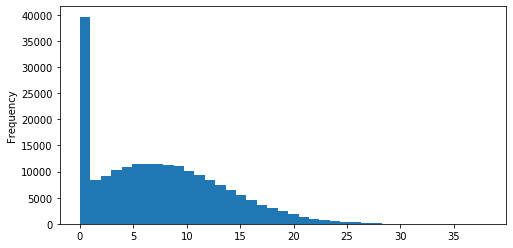

In [23]:
calls['duration'].plot(kind='hist', bins = 39, figsize=(8, 4))

47927 звонков длятся 0 минут, предположим что это пропущенные вызовы. Так как за эти звонки абонент не платит и минуты не расходуются, можно их смело удалять, не боясь потерять важные данные.

In [24]:
calls = calls.query('duration != 0')

In [25]:
calls.describe()

,id,duration,user_id
count,1.629940e+05,162994.000000,162994.000000
mean,1.212660e+06,8.897880,1254.149877
std,1.728141e+06,5.353761,144.751050
min,1.000200e+04,1.000000,1000.000000
25%,1.012247e+06,5.000000,1126.000000
50%,1.179350e+06,8.000000,1261.000000
75%,1.358215e+06,12.000000,1379.000000
max,1.458115e+07,38.000000,1499.000000


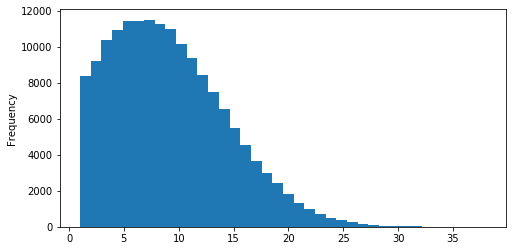

In [26]:
calls['duration'].plot(kind='hist', bins = 38, figsize=(8, 4))

Теперь мы видим красивое распределение Пуассона. И других ошибок в этой таблице, я не вижу.

In [27]:
internet.describe()

,id,mb_used,user_id
count,1.493960e+05,149396.000000,149396.000000
mean,8.968475e+05,370.622098,1252.099842
std,5.419758e+05,278.387019,144.050823
min,1.000000e+04,0.000000,1000.000000
25%,1.389878e+05,139.000000,1130.000000
50%,1.145212e+06,349.000000,1251.000000
75%,1.321559e+06,560.000000,1380.000000
max,1.499156e+06,1725.000000,1499.000000


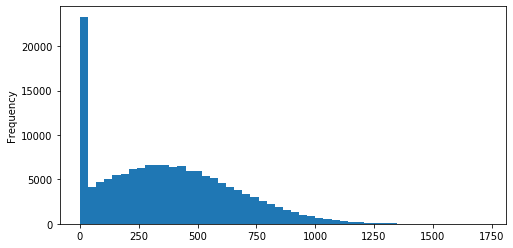

In [28]:
internet['mb_used'].plot(kind='hist', bins = 50, figsize=(8, 4))

19598 нулевых значений. Предположу что это просто факты установки соединения и было передано недостаточно информации для тарификации. Предположу что если у нас этот трафик не отобразился то и оператор не заработал, а это значит мы можем безболезненно удалить эти данные.

In [29]:
internet = internet.query('mb_used != 0')

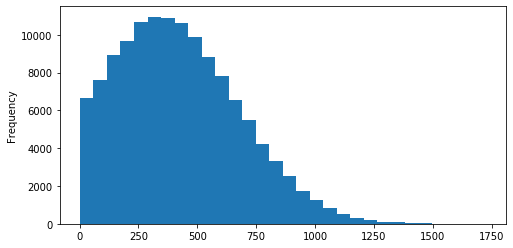

In [30]:
internet['mb_used'].plot(kind='hist', bins = 30, figsize=(8, 4))

Больше в этой таблице нет выбросов. На графике мы видим распределение Паусса.

### Подсчет израсходованных минут, смс, интернет трафика и выручки с каждого пользователя по месяцам

In [31]:
def month(df, col): 
    df = df.assign(month=df[col].dt.month)
    return df

Функция добавляет колонку с месяцами

#### Считаем количество израсходованных минут и сделанных звонков

In [32]:
calls = month(calls, 'call_date')

In [33]:

calls_pivot = calls.pivot_table(index=['user_id', 'month'],
                                values='duration', aggfunc=("sum",'count')).reset_index()

calls_pivot.columns = ('user_id', 'month', 'calls_count', 'mins')
calls_pivot

,user_id,month,calls_count,mins
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612


Создали таблицу по пользователям и количеству звонков и израсходованных минут.

#### Считаем количество отправленных смс

In [34]:
messages = month(messages, 'message_date')

In [35]:
messages_pivot = messages.pivot_table(index=['user_id','month'],
                                      values='message_date', aggfunc=('count')).reset_index()

messages_pivot.columns = ('user_id', 'month', 'messages_count')
messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Посчитали количество сообщений по месяцам

####  Считаем количество израсходованного трафика

In [36]:
internet = month(internet, 'session_date')

In [37]:
internet_pivot = internet.pivot_table(index=['user_id','month'],
                                      values='mb_used', aggfunc=('sum')).reset_index()

internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Посчитали количество израсходованных мегабайт по месяцам

#### Подсчет выручки

In [38]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [39]:
data_merge = calls_pivot.merge(messages_pivot, on=('user_id', 'month'), how='outer')
data_merge = data_merge.merge(internet_pivot, on=('user_id', 'month'), how='outer')
data_merge = data_merge.merge(users, on=('user_id'), how='left')
data_merge = data_merge.merge(tariffs, on=('tariff'), how='left')
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3168 non-null float64
mins                     3168 non-null float64
messages_count           2717 non-null float64
mb_used                  3201 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

Объединили таблицы.

После объединения появились пропуски, так как некоторые абоненты не пользовались всеми услугами каждый месяц. 
Потеряли двух абонентов которые вообще не пользовались услугами связи.
Будем заполнять их 0 и менять тип данных.

In [40]:
for col in ['calls_count', 'mins', 'messages_count','mb_used']:
    data_merge[col] = data_merge[col].fillna(0).astype(int)
data_merge.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3214 non-null int64
mins                     3214 non-null int64
messages_count           3214 non-null int64
mb_used                  3214 non-null int64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute   

Функция подсчета прибыли

In [41]:
def profit_calculation(df):
    df['profit'] = df['rub_monthly_fee']
    if df['mins'] > df['minutes_included']:
        df['profit'] += (df['mins'] - df['minutes_included']) * df['rub_per_minute']
    if df['messages_count'] > df['messages_included']:
        df['profit'] += (df['messages_count'] - df['messages_included']) * df['rub_per_message']
    if df['mb_used'] > df['mb_per_month_included']:
        df['profit'] += (df['mb_used'] - df['mb_per_month_included']) * (df['rub_per_gb'] / 1024)    
    return df    
    

In [42]:
data_merge = data_merge.apply(profit_calculation, axis=1)
data_merge['profit'] = data_merge['profit'].astype(int)
data_merge

,user_id,month,calls_count,mins,messages_count,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,5,17,159,22,2256,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,28,172,60,23257,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,41,340,75,14016,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,42,408,81,14070,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,46,466,57,14581,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0,0,21,19588,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1375
3210,1489,11,0,0,20,17516,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,971
3211,1489,12,0,0,35,17341,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,936
3212,1240,2,0,0,0,961,30,NaT,Воронеж,Зинаида,...,2018-02-27,ultra,1000,30720,3000,1950,150,1,1,1950


In [43]:
data_merge = data_merge.drop(['first_name', 'last_name', 'messages_included', 'mb_per_month_included','minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
data_merge.columns

Index(['user_id', 'month', 'calls_count', 'mins', 'messages_count', 'mb_used',
       'age', 'churn_date', 'city', 'reg_date', 'tariff', 'profit'],
      dtype='object')

Удалил лишние колонки.


## Шаг 3. Анализ данных<a id='step_3'></a>

[На начало](#start)

### Описание поведения клиентов оператора исходя из выборки

#### Количество минут разговора,  сообщений и объёма интернет-трафика требующегося пользователям каждого тарифа в месяц

In [44]:
data_merge

,user_id,month,calls_count,mins,messages_count,mb_used,age,churn_date,city,reg_date,tariff,profit
0,1000,5,17,159,22,2256,52,NaT,Краснодар,2018-05-25,ultra,1950
1,1000,6,28,172,60,23257,52,NaT,Краснодар,2018-05-25,ultra,1950
2,1000,7,41,340,75,14016,52,NaT,Краснодар,2018-05-25,ultra,1950
3,1000,8,42,408,81,14070,52,NaT,Краснодар,2018-05-25,ultra,1950
4,1000,9,46,466,57,14581,52,NaT,Краснодар,2018-05-25,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0,0,21,19588,35,NaT,Санкт-Петербург,2018-08-15,smart,1375
3210,1489,11,0,0,20,17516,35,NaT,Санкт-Петербург,2018-08-15,smart,971
3211,1489,12,0,0,35,17341,35,NaT,Санкт-Петербург,2018-08-15,smart,936
3212,1240,2,0,0,0,961,30,NaT,Воронеж,2018-02-27,ultra,1950


#### Посчитать среднее количество, дисперсию и стандартное отклонение.

In [45]:
def func_pivot(value):
    table = data_merge.pivot_table(index=('tariff'), values=value,\
                       aggfunc=('median','mean','var','std')).astype(int).reset_index()
    return table

In [46]:
mins_pivot = func_pivot('mins')
mins_pivot

,tariff,mean,median,std,var
0,smart,417,422,190,36219
1,ultra,526,518,317,100873


In [47]:
messages_pivot = func_pivot('messages_count')
messages_pivot

,tariff,mean,median,std,var
0,smart,33,28,28,796
1,ultra,49,38,47,2285


In [48]:
internet_pivot = func_pivot('mb_used')
internet_pivot

,tariff,mean,median,std,var
0,smart,16229,16531,5877,34545911
1,ultra,19486,19324,10096,101935621


#### Построить гистограммы, описать распределения.

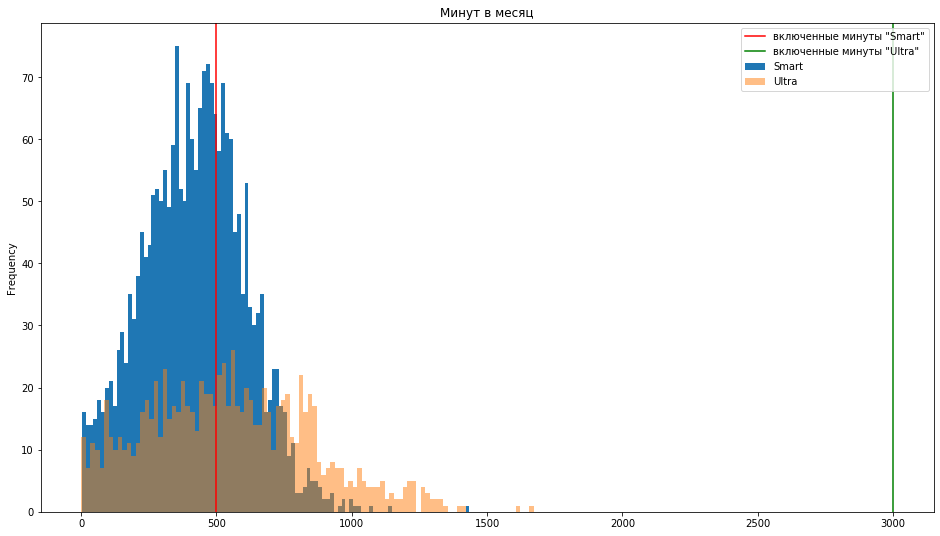

In [49]:
data_merge[(data_merge['tariff'] == 'smart')
           & (data_merge['mins'] !=0)]['mins'].plot(kind='hist', bins=100, title='Минут в месяц', figsize=(16, 9))

data_merge[(data_merge['tariff'] == 'ultra')
           & (data_merge['mins'] !=0)]['mins'].plot(kind='hist', bins=100, alpha = 0.5)

plt.axvline(x=500, color='r')
plt.axvline(x=3000, color='g')
plt.legend(['включенные минуты "Smart"', 'включенные минуты "Ultra"', "Smart", "Ultra"], loc=1)

Наблюдаем распределение Гаусса. Люди на обоих тарифах разговаривают в районе 500 минут в месяц. Пользователи тарифа "Smart" часто выходят за пределы включенных в тариф минут. А пользователи тарифа "Ultra" даже не приближаются к пороговому значению.

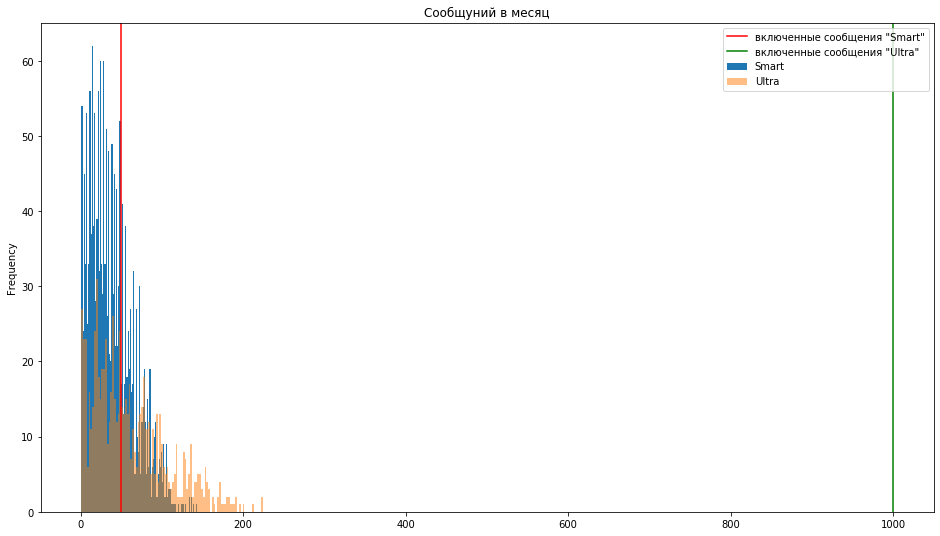

In [50]:
data_merge[(data_merge['tariff'] == 'smart')
           & (data_merge['messages_count'] !=0)]['messages_count'].plot(
    kind='hist', bins=100, title='Сообщуний в месяц', figsize=(16, 9))

data_merge[(data_merge['tariff'] == 'ultra')
           & (data_merge['messages_count'] !=0)]['messages_count'].plot(
    kind='hist', bins=100, alpha = 0.5)

plt.axvline(x=50, color='r')
plt.axvline(x=1000, color='g')
plt.legend(['включенные сообщения "Smart"', 'включенные сообщения "Ultra"', "Smart", "Ultra"], loc=1)

Наблюдаем распределение Паусса. И в сообщениях пользователи тарифа "Smart" часто выходят за включенный в тариф лимит. Пользователи тарифа "Ultra" так же как и со звонками далеки от лимита.

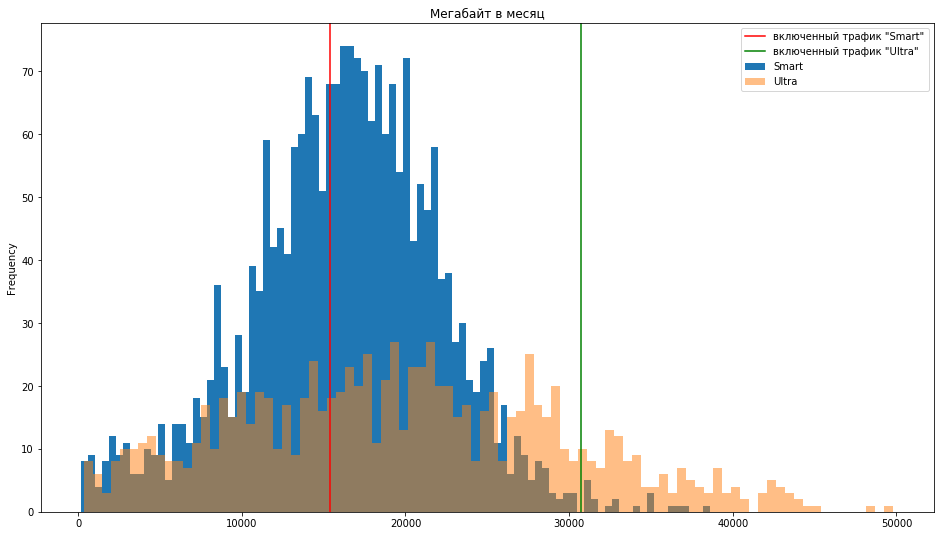

In [51]:
data_merge[(data_merge['tariff'] == 'smart')
           &(data_merge['mb_used'] !=0)]['mb_used'].plot(kind='hist', bins=90, title='Мегабайт в месяц', figsize=(16, 9))

data_merge[(data_merge['tariff'] == 'ultra')
           &(data_merge['mb_used'] !=0)]['mb_used'].plot(kind='hist', bins=90, alpha = 0.5)

plt.axvline(x=15360, color='r')
plt.axvline(x=30720, color='g')
plt.legend(['включенный трафик "Smart"', 'включенный трафик "Ultra"', "Smart", "Ultra"], loc=1)

На графике распределение Гаусса. Интернетом абоненты пользуются гораздо активнее чем прочими услугами связи. В среднем пользователи тарифа "Smart" используют 16229 мб. данных в месяц, при лимите 15360 мб.

## Шаг 4. Проверить гипотезы<a id='step_4'></a>

[На начало](#start)

### Cредняя выручка пользователей тарифов "Ultra" и "Smart" различается;

* H₀: Средняя выручка пользователей тарифов "Ultra" и "Smart" не различается
* H₁: Средняя выручка пользователей тарифов "Ultra" и "Smart" различается

In [53]:
df_smart = data_merge[data_merge['tariff'] == 'smart']
df_ultra = data_merge[data_merge['tariff'] == 'ultra']
alpha = 0.05

result = st.ttest_ind(df_smart['profit'], df_ultra['profit'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.2203157605818e-191
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, а значит с большой вероятностью мы можем говорить о том что пользователи тарифа "Ultra" приносят больше денег компании.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

* H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
* H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [55]:
df_moscow = data_merge[data_merge['city'] == 'Москва']
df_another_city = data_merge[data_merge['city'] != 'Москва']

abs(np.mean(df_moscow ['profit']) - np.mean(df_another_city['profit'])) / (np.var(df_another_city['profit']))

4.003629609860594e-05

<div class="alert alert-info" role="alert">
  Сравнил дисперсии критерием Фишера, различие не значительное  
</div>

In [65]:
alpha = 0.05

result = st.ttest_ind(df_moscow ['profit'], df_another_city['profit'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4741107329003996
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, большая вероятность, что пользователи из Москвы тратят столько же сколько пользователи из других городов.

## Шаг 5. Общий вывод <a id='end'></a>

[На начало](#start)

Пользователей тарифного плана "Ultra" на 56% меньше чем пользователей тарифа "Smart", но и денег среднестатистический пользователь тарифа "Ultra" приносит на 67% в среднем больше чем пользователь тарифа "Smart". В среднем абонентам "Мегалайн" 47 лет и на связь они тратят 1500р..

Пятерка самых популярных городов: 
- Москва             27%
- Санкт-Петербург      12%
- Новосибирск          4%
- Уфа                4%
- Краснодар            4%

В среднем пользователи тарифа "Smart" разговаривают 417 минут в месяц, а пользователи тарифа "Ultra" 526 минут. Пользователи "Smart" отправляют 33 сообщения, а на тарифе "Ultra" 49.<br> 
Интернет трафик пользователи "Smart" расходуют 15.84 гб. в месяц, на тарифе "Ultra" 19.02 гб.<br>
На тарифе "Smart" в среднем тратят 1233р., на тарифе "Ultra" 2060р. в месяц.